In [1]:
# https://www.youtube.com/watch?v=UkzhouEk6uY&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=3

import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

import keras 
from keras.callbacks import TensorBoard
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras.layers.core import Dense
from keras.metrics import categorical_crossentropy

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
graph_dir = "F:\\Python Projects\\GRAPH\\durg's_check_by_keras_graph"

train_labels = []
train_sample = []

In [3]:
''' DESC OF DATA
An experimental drug was tested on individual from ages 13 - 100
The Trail had 2100 participants. Half were under 65 & half were above 65
95% of the patinent 65 or older expirenced side effects
95% of the patinent below 65 has no effect 
'''

' DESC OF DATA\nAn experimental drug was tested on individual from ages 13 - 100\nThe Trail had 2100 participants. Half were under 65 & half were above 65\n95% of the patinent 65 or older expirenced side effects\n95% of the patinent below 65 has no effect \n'

In [4]:
for i in range(50):
#     the 5% of younger individuals who did experice the side effects
    random_younger = randint(13,64)
    train_sample.append(random_younger)
    train_labels.append(1)
    
#     the 5% of older individuals who did not experice the side effects
    random_older = randint(65,100)
    train_sample.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
#     the 95% of younger individuals who did not experice the side effects
    random_younger = randint(13,64)
    train_sample.append(random_younger)
    train_labels.append(0)
#     the 95% of older individuals who did experice the side effects    
    random_older = randint(65,100)
    train_sample.append(random_older)
    train_labels.append(1)    

In [5]:
# for i in train_sample:
#     print(i)

In [6]:
# for i in train_labels:
#     print(i)

In [7]:
train_labels = np.array(train_labels)
train_sample = np.array(train_sample)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_sample = scaler.fit_transform((train_sample).reshape(-1,1))

c:\users\vinayak tyagi\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
for i in scaled_train_sample:
    print(i)

[0.45977011]
[0.72413793]
[0.14942529]
[0.95402299]
[0.25287356]
[0.97701149]
[0.31034483]
[0.95402299]
[0.43678161]
[0.98850575]
[0.54022989]
[0.6091954]
[0.51724138]
[0.64367816]
[0.44827586]
[0.59770115]
[0.18390805]
[0.90804598]
[0.55172414]
[0.89655172]
[0.28735632]
[0.86206897]
[0.31034483]
[0.79310345]
[0.35632184]
[0.66666667]
[0.40229885]
[0.86206897]
[0.5862069]
[0.96551724]
[0.48275862]
[0.89655172]
[0.3908046]
[0.97701149]
[0.12643678]
[0.7816092]
[0.54022989]
[0.72413793]
[0.50574713]
[0.86206897]
[0.01149425]
[0.88505747]
[0.13793103]
[0.95402299]
[0.03448276]
[0.7816092]
[0.37931034]
[0.66666667]
[0.04597701]
[0.83908046]
[0.08045977]
[0.98850575]
[0.57471264]
[0.66666667]
[0.02298851]
[0.75862069]
[0.16091954]
[0.6091954]
[0.32183908]
[0.66666667]
[0.1954023]
[0.91954023]
[0.26436782]
[0.81609195]
[0.55172414]
[0.73563218]
[0.50574713]
[0.64367816]
[0.3908046]
[0.6091954]
[0.37931034]
[0.74712644]
[0.57471264]
[1.]
[0.11494253]
[0.64367816]
[0.12643678]
[0.7816092]
[0.3

[0.1954023]
[0.63218391]
[0.1954023]
[0.94252874]
[0.20689655]
[0.81609195]
[0.20689655]
[0.87356322]
[0.10344828]
[0.8045977]
[0.42528736]
[0.64367816]
[0.52873563]
[0.75862069]
[0.16091954]
[0.98850575]
[0.13793103]
[0.82758621]
[0.45977011]
[0.86206897]
[0.49425287]
[0.91954023]
[0.24137931]
[0.75862069]
[0.05747126]
[0.79310345]
[0.56321839]
[0.71264368]
[0.34482759]
[0.73563218]
[0.34482759]
[0.85057471]
[0.08045977]
[0.98850575]
[0.32183908]
[0.82758621]
[0.]
[0.77011494]
[0.24137931]
[0.83908046]
[0.24137931]
[0.68965517]
[0.08045977]
[0.72413793]
[0.10344828]
[0.6091954]
[0.09195402]
[0.94252874]
[0.57471264]
[0.86206897]
[0.42528736]
[0.65517241]
[0.05747126]
[0.88505747]
[0.5862069]
[0.72413793]
[0.17241379]
[0.87356322]
[0.54022989]
[0.95402299]
[0.34482759]
[0.64367816]
[0.28735632]
[0.72413793]
[0.04597701]
[0.81609195]
[0.24137931]
[0.83908046]
[0.2183908]
[0.71264368]
[0.40229885]
[0.6091954]
[0.1954023]
[0.71264368]
[0.44827586]
[0.75862069]
[0.35632184]
[0.72413793]
[0

[0.51724138]
[0.95402299]
[0.09195402]
[0.95402299]
[0.17241379]
[0.91954023]
[0.31034483]
[0.72413793]
[0.36781609]
[0.93103448]
[0.34482759]
[0.70114943]
[0.12643678]
[0.97701149]
[0.29885057]
[0.77011494]
[0.34482759]
[0.81609195]
[0.10344828]
[0.88505747]
[0.22988506]
[0.87356322]
[0.52873563]
[0.6091954]
[0.44827586]
[0.77011494]
[0.1954023]
[0.72413793]
[0.32183908]
[0.90804598]
[0.02298851]
[0.96551724]
[0.28735632]
[0.85057471]
[0.01149425]
[0.97701149]
[0.48275862]
[0.85057471]
[0.5862069]
[0.68965517]
[0.08045977]
[0.65517241]
[0.16091954]
[0.87356322]
[0.03448276]
[0.59770115]
[0.29885057]
[0.96551724]
[0.11494253]
[0.93103448]
[0.54022989]
[0.96551724]
[0.27586207]
[0.82758621]
[0.48275862]
[0.95402299]
[0.48275862]
[0.87356322]
[0.06896552]
[0.64367816]
[0.03448276]
[0.96551724]
[0.50574713]
[0.98850575]
[0.18390805]
[0.74712644]
[0.40229885]
[0.87356322]
[0.18390805]
[0.63218391]
[0.56321839]
[0.7816092]
[0.47126437]
[0.88505747]
[0.16091954]
[0.73563218]
[0.36781609]
[0.

In [10]:
model = Sequential([
    Dense(16,input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation = 'softmax')
])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
tensorboard = TensorBoard(log_dir = graph_dir, histogram_freq=0,write_graph=True, write_images=True )

In [14]:
print(scaled_train_sample); print(train_labels)
model.fit(scaled_train_sample, train_labels, batch_size = 10, epochs=20,  validation_split=0.1, shuffle=True, verbose=2, callbacks=[tensorboard] )
# IF validation_split is given than it's neccassry to make suffle=true else its true by default 

[[0.45977011]
 [0.72413793]
 [0.14942529]
 ...
 [0.77011494]
 [0.40229885]
 [0.95402299]]
[1 0 1 ... 1 0 1]
Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 1s - loss: 0.5671 - acc: 0.7222 - val_loss: 0.3936 - val_acc: 0.9095
Epoch 2/20
 - 0s - loss: 0.3543 - acc: 0.9016 - val_loss: 0.2104 - val_acc: 0.9429
Epoch 3/20
 - 0s - loss: 0.2885 - acc: 0.9275 - val_loss: 0.1609 - val_acc: 0.9810
Epoch 4/20
 - 0s - loss: 0.2740 - acc: 0.9312 - val_loss: 0.1424 - val_acc: 1.0000
Epoch 5/20
 - 0s - loss: 0.2654 - acc: 0.9328 - val_loss: 0.1384 - val_acc: 0.9714
Epoch 6/20
 - 0s - loss: 0.2633 - acc: 0.9354 - val_loss: 0.1247 - val_acc: 0.9810
Epoch 7/20
 - 0s - loss: 0.2600 - acc: 0.9317 - val_loss: 0.1225 - val_acc: 0.9810
Epoch 8/20
 - 0s - loss: 0.2575 - acc: 0.9365 - val_loss: 0.1264 - val_acc: 0.9571
Epoch 9/20
 - 0s - loss: 0.2574 - acc: 0.9370 - val_loss: 0.1143 - val_acc: 0.9857
Epoch 10/20
 - 0s - loss: 0.2563 - acc: 0.9381 - val_loss: 0.1164 - val_acc: 1.0000
Epoch 11/20
 -

In [15]:
    #evaluate the model
    score = model.evaluate(scaled_train_sample, train_labels)
    print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100 ))

2100/2100 [==============================] - 0s 31us/step

acc: 93.57%


In [16]:
test_labels = []
test_sample = []

In [17]:
for i in range(10):
#     the 5% of younger individuals who did experice the side effects
    random_younger = randint(13,64)
    test_sample.append(random_younger)
    test_labels.append(1)
    
#     the 5% of older individuals who did not experice the side effects
    random_older = randint(65,100)
    test_sample.append(random_older)
    test_labels.append(0)
    
for i in range(200):
#     the 95% of younger individuals who did not experice the side effects
    random_younger = randint(13,64)
    test_sample.append(random_younger)
    test_labels.append(0)
#     the 95% of older individuals who did experice the side effects    
    random_older = randint(65,100)
    test_sample.append(random_older)
    test_labels.append(1) 

In [18]:
test_labels = np.array(test_labels)
test_sample = np.array(test_sample)

print(test_labels); print(test_sample)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1]
[ 23  68  48  69  58  88  43  85  55  65  62  81  23  81  39  98  60  68
  52  81  23  83  59  76  46  77  30  70  19  68  20  77  20  67  54  67
 

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_sample = scaler.fit_transform((test_sample).reshape(-1,1))

c:\users\vinayak tyagi\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
predict = model.predict(scaled_train_sample, batch_size=10,verbose=0)
for i in predict:
    print(i)

[0.96349525 0.03650475]
[0.19247647 0.80752355]
[0.93964285 0.0603572 ]
[0.16762842 0.83237153]
[0.8007001  0.19929981]
[0.02372221 0.97627777]
[0.9533716  0.04662836]
[0.0328177 0.9671823]
[0.8894861  0.11051397]
[0.35736364 0.6426364 ]
[0.56480205 0.43519792]
[0.05029739 0.94970256]
[0.96349525 0.03650475]
[0.05029739 0.94970256]
[0.9585462  0.04145378]
[0.00792016 0.9920798 ]
[0.6954398  0.30456012]
[0.19247647 0.80752355]
[0.92439526 0.07560477]
[0.05029738 0.94970256]
[0.96349525 0.03650475]
[0.04066755 0.9593324 ]
[0.7517888  0.24821123]
[0.08458134 0.9154186 ]
[0.9455379  0.05446205]
[0.07635221 0.92364776]
[0.9628564  0.03714359]
[0.15266706 0.84733295]
[0.9638555  0.03614446]
[0.19247647 0.80752355]
[0.9637658  0.03623423]
[0.07635221 0.92364776]
[0.9637658  0.03623423]
[0.24015586 0.7598441 ]
[0.9048073  0.09519271]
[0.24015586 0.7598441 ]
[0.96313155 0.0368685 ]
[0.00709181 0.99290824]
[0.96349525 0.03650475]
[0.01532905 0.984671  ]
[0.9638555  0.03614446]
[0.00987543 0.9901

In [21]:
predict_class = model.predict_classes(scaled_train_sample, batch_size=10, verbose=0)
for i in predict_class:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [22]:
confusion_matrix(test_labels,predict_class)

array([[189,  21],
       [ 10, 200]], dtype=int64)

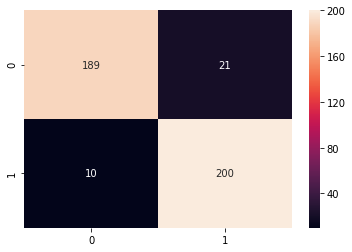

In [23]:
sns.heatmap(confusion_matrix(test_labels,predict_class),annot=True,fmt='.5g')

In [24]:
model.save('durg_check_model.h5')

In [25]:
from keras.models import load_model
new_model = load_model('durg_check_model.h5') # Or try to save as .model

In [26]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [27]:
new_model.get_weights()

[array([[ 3.9701417e-01, -3.2890007e-01, -2.4356815e-01,  6.4737123e-01,
         -1.1736876e-01,  5.0163943e-01, -1.8580735e-01, -4.8083833e-01,
          3.8998279e-01, -3.8907772e-01,  6.9893855e-01, -6.6121318e-04,
         -5.8234560e-01, -6.6840768e-02, -2.3561120e-02, -8.5196495e-02]],
       dtype=float32),
 array([-0.19773228,  0.        ,  0.        , -0.28716686,  0.        ,
        -0.09947325,  0.        ,  0.        , -0.19488391,  0.        ,
        -0.22726047, -0.014669  ,  0.        ,  0.        ,  0.        ,
         0.24196102], dtype=float32),
 array([[-2.52904266e-01,  3.34367126e-01, -1.00395143e-01,
          3.44020903e-01, -1.88132152e-01,  6.04825556e-01,
         -1.33685499e-01,  6.58134162e-01, -3.00207376e-01,
         -7.50490129e-01,  5.29894650e-01,  7.20262527e-02,
         -2.76490629e-01,  3.65716189e-01, -9.25650895e-02,
          3.08241755e-01,  2.37195641e-01, -5.61320007e-01,
          2.39618793e-01,  6.57219589e-01, -9.83798385e-01,
      

In [28]:
new_model.optimizer